# Hierarchical Clustering

### Introduction

Problems like segmenting customers are often deceptively tricky because we are not working with any target variable in mind. We are officially in the land of unsupervised learning where we need to figure out patterns and structures without a set outcome in mind.

Also called Hierarchical cluster analysis or HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

For e.g: All files and folders on our hard disk are organized in a hierarchy.

The algorithm groups similar objects into groups called clusters. The endpoint is a set of clusters or groups, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.


### Types of Hierarchical Clustering

There are mainly two types of hierarchical clustering:

1. Agglomerative hierarchical clustering
2. Divisive Hierarchical clustering

### Agglomerative Hierarchical Clustering
 
The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

![Agglomerative Hierarchical Clustering](ahc.gif)

### Working of Agglomerative Hierrachical Clustering


1. Make each data point a single-point cluster → forms N clusters

2. Take the two closest data points and make them one cluster → forms N-1 clusters

3. Take the two closest clusters and make them one cluster → Forms N-2 clusters.

4. Repeat step-3 until you are left with only one cluster.


There are several ways to measure the distance between clusters in order to decide the rules for clustering, and they are often called Linkage Methods. Some of the common linkage methods are:

1. Complete-linkage: the distance between two clusters is defined as the longest distance between two points in each cluster.

2. Single-linkage: the distance between two clusters is defined as the shortest distance between two points in each cluster. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.

3. Average-linkage: the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

4. Centroid-linkage: finds the centroid of cluster 1 and centroid of cluster 2, and then calculates the distance between the two before merging.

The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters.

The point of doing all this is to demonstrate the way hierarchical clustering works, it maintains a memory of how we went through this process and that memory is stored in Dendrogram.

### Dendrogram?

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

![Dendrogram](dd1.gif)
![Dendrogram](dd2.gif)
Note:- 

    1. Distance between data points represents dissimilarities.
    2. Height of the blocks represents the distance between clusters.
    
So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.  

### Parts of Dendrogram
 

A dendrogram can be a column graph (as in the image below) or a row graph. Some dendrograms are circular or have a fluid-shape, but the software will usually produce a row or column graph. No matter what the shape, the basic graph comprises the same parts:

![Parts of Dendrogram](pd1.png)

    The Clades are the branch and are arranged according to how similar (or dissimilar) they are. Clades that are close to the same height are similar to each other; clades with different heights are dissimilar — the greater the difference in height, the more dissimilarity.

    1. Each clade has one or more leaves.
    
    2. Leaves A, B, and C are more similar to each other than they are to leaves D, E, or F.
    
    3. Leaves D and E are more similar to each other than they are to leaves A, B, C, or F.
    
    4. Leaf F is substantially different from all of the other leaves.

A clade can theoretically have an infinite amount of leaves. However, the more leaves you have, the harder the graph 
will be to read with the naked eye.


### Selection of Optimal Number of Clusters

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

![Optimal Number of Cluster Selection](ocns.jpg)

Number of Clusters in this case = 3.

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the Dataset

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

In [11]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Using the Dendrogram to find Optimal number of Clusters

To find the optimal number of clusters in the feature matri(X) we are going to use the hierarchy class of the cluster module of the scipy package.

First of all we make a dendrogram object using the dendrogram method of sch, which takes linkage method as argument which inded links the feature matrix X with the variance minimization method(ward) as argument.

Each value on X axis represent a corresponding row.

To get the optimal number of cluster we draw a line parallel to X axis at top most horizontal bar and move it twords X axis untill it overlaps an horizontal line.

During this movement the longest line we get before touching any horizontal bar is the place of division of clusters.
We count the number of prependicular lines crossing this imaginary line is the number of optimal clusters.

Note: Their may be more than one optimal number of clusters. 

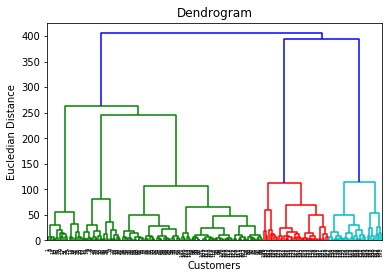

In [13]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')            #in general is always the rows
plt.ylabel('Eucledian Distance')   #always in all cases
plt.show()

In this case we got two optimal value of clusters 3 and 5.

## Training the Hierarchical Clustering Model

To make our Hierarchical Clustering Model we are using the AgglomerativeClustering class of the cluster module of the sklearn package.

First we create the instance or object of AgglomerativeClustering class which is our model. It takes number of cluster(n_clusters), distance measuring method(affinity) and variance minimzation method(linkage) as argument.

After that we train, create and predict the value of our dependent variable using the fit_predict method on our model(hc) which takes the feature matrix as argument.

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(X)

In [27]:
print(Y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing the Hierarchical Clustering

Here each scatter plot is for each cluster which plots two dependent feature belonging to certain cluster.
i.e  plt.scatter(X[Y_hc == cluster_index, dependent feature column index])

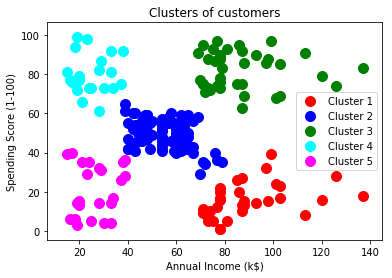

In [28]:
plt.scatter(X[Y_hc == 0, 0], X[Y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_hc == 1, 0], X[Y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_hc == 2, 0], X[Y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[Y_hc == 3, 0], X[Y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[Y_hc == 4, 0], X[Y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()